## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Bank Churn data

In [2]:
path = 'Bank_Churn_Messy.xlsx'
data = pd.read_excel(path, sheet_name = None) 
# sheet_name  =  None, to import all sheets in the file. otherwise, it will import the first one or the name mentioned
# This also imports the sheets as dictionary

In [3]:
data.keys() # to display the sheet names

dict_keys(['Acc_info', 'Customer_Info'])

In [4]:
customer_info = data['Customer_Info']
account_info = data['Acc_info']

In [5]:
customer_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [6]:
account_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


## Joining the two Datasets together

In [7]:
df = pd.merge(customer_info, account_info, on = ['CustomerId', 'Tenure'], how = 'left') 
# on is what to join it with, more than one -- list, one -- just as a string
# how is type of join
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


## Check for and drop NA (null values)

In [8]:
df.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
#to confirm
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

## Check for and drop Duplicated values 

In [11]:
df.duplicated().sum()

4

In [12]:
df.drop_duplicates(inplace =True)

In [13]:
# to confirm
df.duplicated().sum()

0

## Correctly format the Geography column

In [14]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [15]:
df['Geography'].value_counts()

Geography
Germany    2508
Spain      2475
France     1740
French     1655
FRA        1618
              1
Name: count, dtype: int64

In [16]:
df['Geography'] = df['Geography'].astype(str).replace({'FRA':'France', 'French':'France'})
df['Geography'].value_counts()

Geography
France     5013
Germany    2508
Spain      2475
              1
Name: count, dtype: int64

In [17]:
# to remove the empty space
df = df[df['Geography'].isin(['Germany', 'France', 'Spain'])]
#can be written as df[(df['Geography'] == 'Germany') | (df['Geography'] == 'France') | (df['Geography'] == 'Spain')]

df['Geography'].value_counts()

Geography
France     5013
Germany    2508
Spain      2475
Name: count, dtype: int64

In [18]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
3,15619304,Onio,502,France,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
6,15574012,Chu,645,Spain,Male,44.0,8,€149756.71,€113755.78,2,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,No,0
9997,15569892,Johnstone,516,France,Male,35.0,10,€101699.77,€57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,France,Female,36.0,7,€42085.58,€0.0,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1


## Question 1:
<p>What is the total balance for each Geography</p>

In [19]:
# First convert Balance to numerical value
df['Balance'] = df['Balance'].astype(str).replace(r'[^\d.]', '', regex = True).astype(float)

#then 
total_bal_byGeo = df.groupby('Geography')['Balance'].sum()

#can as well be written as :
# total_bal_byGeo =  df.groupby('Geography').agg({'Balance': 'sum'})
total_bal_byGeo

Geography
France     3.113325e+08
Germany    3.002615e+08
Spain      1.529196e+08
Name: Balance, dtype: float64

#### Displaying the total balance for each geography without Scientific notation (e+10)

In [20]:
for geo, bal in total_bal_byGeo.items():
    print(f"{geo}: {bal:.2f}")

France: 311332479.49
Germany: 300261511.95
Spain: 152919550.73


## Question 2
<p>Which age group has the highest credit score?</p>

In [21]:
df['Age']

0        42.0
3        42.0
4        39.0
5        43.0
6        44.0
         ... 
9996     39.0
9997     35.0
9998     36.0
9999     42.0
10000    28.0
Name: Age, Length: 9996, dtype: float64

In [22]:
# First, lets create the Age groups
bins =  [18, 30, 50, 70, 90, 100]
label = ['18-30',  '31-50', '51-70', '71-90', '91+']
df['Age Group'] = pd.cut(x = df['Age'], bins=bins, labels=label)


## Another form of creating age grade
# Create a function
def age_grade(age):
    if age< 18:
        return f'less 18'

    elif 18 <= age <=30:
        return f"18-30"

    elif 31 <= age <= 50:
        return f"31-50"

    elif 51 <= age <= 70:
        return f"51-70"

    elif 71 <= age <= 90:
        return f"71-90"

    else:
        return f"91+"

# Then use the function to create the age grade
# df['Age Grade'] = df['Age'].apply(lambda x: age_grade(x))

#dropping the created Age Grade column
# df.drop(columns='Age Grade', inplace=True)

In [23]:
df.groupby('Age Group').agg({'CreditScore': 'mean'}).sort_values(by= 'CreditScore', ascending=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3800\1709588161.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group').agg({'CreditScore': 'mean'}).sort_values(by= 'CreditScore', ascending=True)


,CreditScore
Age Group,
51-70,648.070922
31-50,650.532141
18-30,650.799589
71-90,661.816794
91+,729.000000


## Question 3
<p>What is the average Estimated Salary for each Gender?</p>

In [24]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(str).replace(r'[^\d.]', '', regex = True).astype(float)

df.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100603.511443
Male       99664.491452
Name: EstimatedSalary, dtype: float64

## Question 4
<p>What is the average balance for active members compared to active members?</p>

In [25]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Age Group'],
      dtype='object')

In [26]:
# df['Balance'] = df['Balance'].astype(str).replace(r'[^\d]', '', regex = True).astype(float)
# avr_by_active = df.groupby('IsActiveMember')['Balance'].mean()
# avr_by_active

In [27]:
# for active, bal in avr_by_active.items():
#     print(f"{active}: {bal:.2f}")

__Because the "replace" removes the decimal point but add the decimal values as part of the number which makes the number longer__
<p>we do this instead</p>

In [28]:
balance_by_active = df.groupby('IsActiveMember').agg({'Balance': 'mean'}).sort_values(by = 'Balance', ascending = False)
balance_by_active

,Balance
IsActiveMember,
No,77125.495047
Yes,75875.901744


In [29]:
for act, bal in balance_by_active.unstack().items():
    print(f"{act}: {bal:.2f}")

('Balance', 'No'): 77125.50
('Balance', 'Yes'): 75875.90


## Question 5
<p>Which Geography has the highest number of customers with a credit Card</p>

In [30]:
max_CrCard = df[df['HasCrCard'] == 'Yes'].groupby('Geography')['HasCrCard'].count()
# Can be written as: df[df['HasCrCard'] == 'Yes'].groupby('Geography').size() --- . size() replaces the 'column.count()''

max_CrCard

Geography
France     2590
Germany    1247
Spain      1311
Name: HasCrCard, dtype: int64

In [31]:
max_CrCard.idxmax()

'France'

In [32]:
df.groupby(['Geography', 'HasCrCard']).size()

Geography  HasCrCard
France     No           2423
           Yes          2590
Germany    No           1261
           Yes          1247
Spain      No           1164
           Yes          1311
dtype: int64

In [33]:
# to sum all yes or no
x = df.groupby(['Geography', 'HasCrCard']).agg({'HasCrCard': 'count'}).unstack()
x

HasCrCard      
HasCrCard        No   Yes
Geography                
France         2423  2590
Germany        1261  1247
Spain          1164  1311

In [34]:
x.columns

MultiIndex([('HasCrCard',  'No'),
            ('HasCrCard', 'Yes')],
           names=[None, 'HasCrCard'])

In [35]:
#Because its a multiIndex
x.columns[0]

('HasCrCard', 'No')

In [36]:
x.columns[1]

('HasCrCard', 'Yes')

In [37]:
x['HasCrCard','Yes'].sum()

5148

## Question 6
<p>What is the total value of balances for each gender</p>

In [38]:
df.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                 float64
Tenure                int64
EstimatedSalary     float64
Balance             float64
NumOfProducts         int64
HasCrCard            object
IsActiveMember       object
Exited                int64
Age Group          category
dtype: object

In [39]:
balance_by_gender = df.groupby('Gender')['Balance'].sum().sort_values(ascending = False)
for gen, bal in balance_by_gender.items():
    print(f"{gen}: {bal:.2f}")

Male: 421018185.46
Female: 343495356.71


In [40]:
for i, v in balance_by_gender.items():
    print(f"{i}: {v:,.2f}") # ",.2f" adds 2 dpl then comma after 3 numbers

Male: 421,018,185.46
Female: 343,495,356.71


## Question 7
<p>Which age group has the highest churn rate?</p>

In [41]:
df.groupby('Age Group').agg({'Exited' : 'mean'}).idxmax()

C:\Users\HP\AppData\Local\Temp\ipykernel_3800\795162838.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group').agg({'Exited' : 'mean'}).idxmax()


Exited    51-70
dtype: category
Categories (5, object): ['18-30' < '31-50' < '51-70' < '71-90' < '91+']

## Question 8
<p>What is the average tenure of customers who have exited compared to those who have not</p>

In [42]:
df.groupby('Exited').agg({'Tenure':'mean'}).sort_values(by = 'Tenure', ascending = False).round(2)

,Tenure
Exited,
0,5.03
1,4.93


## Question 9
<p>What is the total number of products owned by customers in each Geography</p>

In [43]:
df.groupby('Geography').agg({'NumOfProducts': 'sum'})

,NumOfProducts
Geography,
France,7675
Germany,3812
Spain,3811


## Question 10
<p>Which Age Group has the highest average estimated salary</p>

In [44]:
df.groupby('Age Group')['EstimatedSalary'].mean().sort_values(ascending = False).round(2).head(1)

C:\Users\HP\AppData\Local\Temp\ipykernel_3800\381573960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['EstimatedSalary'].mean().sort_values(ascending = False).round(2).head(1)


Age Group
91+    115000.41
Name: EstimatedSalary, dtype: float64

## Question 11
<p>What is the distribution of the number of products held by customers who have exited versus those who have not?</p>

In [45]:
distribution_by_exit = df.groupby(['Exited', 'NumOfProducts']).agg({'NumOfProducts': 'count'}).unstack().fillna(0) 
# fillna can be replaced by passing paremeter 'fill_value = 0' into the unstack() -- unstack(fill_value = 'No Data')

print(distribution_by_exit)

              NumOfProducts                     
NumOfProducts             1       2      3     4
Exited                                          
0                    3671.0  4242.0   46.0   0.0
1                    1409.0   348.0  220.0  60.0


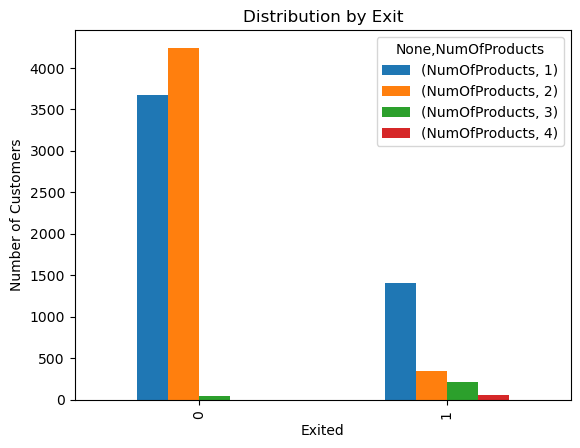

In [46]:
distribution_by_exit.plot(kind = 'bar')
plt.title('Distribution by Exit')
plt.ylabel('Number of Customers')
plt.show()

## Question 12
<p>What is the average balance for customers with different number of products?</p>

In [47]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Age Group'],
      dtype='object')

In [48]:
df.groupby('NumOfProducts').agg({'Balance': 'mean'}).round(2)

,Balance
NumOfProducts,
1,98561.49
2,51879.15
3,75458.33
4,93733.14


## Question 13
<p>Which Gender has a higher average balance for customers that have exited?</p>

In [49]:
avg_bal_by_gen = df[df['Exited'] == 1].groupby('Gender')['Balance'].mean().sort_values(ascending=False)
for gen, bal in avg_bal_by_gen.items():
    print(f"{gen}: {bal:.2f}")


#can also be written as (Best answer since the question is to return the Gender)
#avg_bal_by_gen_and_churn = df[df['Exited'] == 1].groupby('Gender')['Balance'].mean().idxmax
#print(avg_balance_by_gen_and_churn)

Male: 93736.48
Female: 89036.64


## Question 14
<p>What is the most common age group for customers in each geography?</p>

In [50]:
# df.groupby(['Geography', 'Age Group']).size().unstack()

# can as well be written as (best answer as it demands the highest Age Group for each Geography)
commn_age_group_by_geography = df.groupby('Geography')['Age Group'].agg(lambda x: x.mode())
print(commn_age_group_by_geography)

Geography
France     31-50
Germany    31-50
Spain      31-50
Name: Age Group, dtype: category
Categories (5, object): ['18-30' < '31-50' < '51-70' < '71-90' < '91+']


## Question 15
<p>What is the average credit score for customers with and without credit cards</p>

In [51]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Age Group'],
      dtype='object')

In [69]:
df.groupby('HasCrCard').agg({'CreditScore': 'mean'}).round(2)

,CreditScore
HasCrCard,
No,647.97
Yes,652.98


## Question 16
<p>Which combination of geography and gender has the highest average estimated salary?</p>

In [ ]:
df.groupby(['Geography', 'Gender'])['EstimatedSalary'].mean().idxmax()

#also written in this
# df.groupby(['Geography', 'Gender']).agg({'EstimatedSalary': 'mean'}).adxmax()[0]

## Question 17
<p>What is the most common Tenure among customers who have exited?</p>

In [ ]:
df[df['Exited'] == 1].groupby('Exited')['Tenure'].agg(lambda x: x.mode())

#Also written as 
#df[df['Exited'] == 1].groupby('Tenure').size().idmax()    ---- or df[df['Exited'] == 1]['Tenure'].mode()[0]

## Question 18
<p>How does the average balance vary by credit score groups (e.g, low, medium, high)?</p>

In [53]:
# First define the credit score groups
def grp(creditScore):
    if creditScore <= 500:
        return "Low"
    elif  500 < creditScore < 700:
        return "Medium"
    else:
        return "High"


df['Credit Group'] = df['CreditScore'].apply(lambda x : grp(x))

# the other method --- .cut() can only be ujsed when its a numerical value like this

In [59]:
df['Credit Group'].value_counts()

Credit Group
Medium    6205
High      3148
Low        643
Name: count, dtype: int64

In [58]:
df.groupby('Credit Group')['Balance'].mean().round(2).sort_values(ascending = False)

Credit Group
Low       80241.27
High      76689.81
Medium    75986.93
Name: Balance, dtype: float64

<Axes: xlabel='Credit Group'>

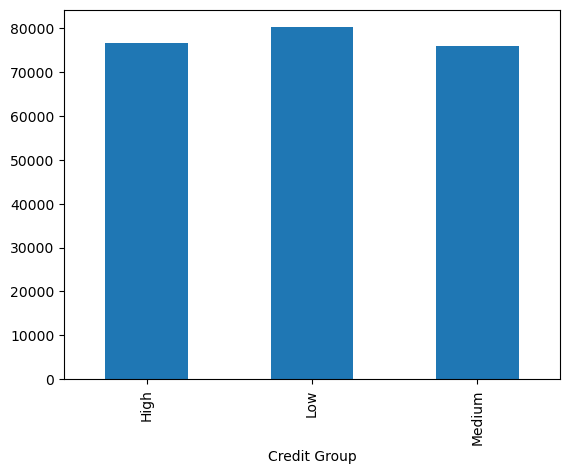

In [60]:
df.groupby('Credit Group')['Balance'].mean().plot(kind = 'bar')

## Question 19
<p>What is the total number of active members in each geography?</p>

In [70]:
df[df['IsActiveMember'] == 'Yes'].groupby('Geography')['IsActiveMember'].count()

# Also written as 
# df[df['IsActiveMember'] == 'Yes'].groupby('Geography').size()

Geography
France     2590
Germany    1247
Spain      1311
Name: IsActiveMember, dtype: int64

## Question 20
<p>What is the avearage estimated salary for customers with a zero balance?</p>

In [72]:
avg_zero_bal = df[df['Balance'] == 0]['EstimatedSalary'].mean()
round(avg_zero_bal, 2)

98988.77

## Correlation 

### Factors most correlated with customer Churn

In [78]:
# Select correlation of the dataset ( those whose datatype is number)
df.select_dtypes(include = 'number').corr()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
CustomerId,1.000000,0.005469,0.009552,-0.014788,0.015319,-0.012250,0.016914,-0.006285
CreditScore,0.005469,1.000000,-0.004003,0.000596,-0.001415,0.006198,0.012045,-0.027207
Age,0.009552,-0.004003,1.000000,-0.010013,-0.007229,0.028189,-0.030692,0.285343
Tenure,-0.014788,0.000596,-0.010013,1.000000,0.007779,-0.012321,0.013194,-0.014145
EstimatedSalary,0.015319,-0.001415,-0.007229,0.007779,1.000000,0.012754,0.014195,0.012091
Balance,-0.012250,0.006198,0.028189,-0.012321,0.012754,1.000000,-0.304220,0.118589
NumOfProducts,0.016914,0.012045,-0.030692,0.013194,0.014195,-0.304220,1.000000,-0.048015
Exited,-0.006285,-0.027207,0.285343,-0.014145,0.012091,0.118589,-0.048015,1.000000


In [79]:
# for only exited
df.select_dtypes(include = 'number').corr()['Exited']

CustomerId        -0.006285
CreditScore       -0.027207
Age                0.285343
Tenure            -0.014145
EstimatedSalary    0.012091
Balance            0.118589
NumOfProducts     -0.048015
Exited             1.000000
Name: Exited, dtype: float64

In [82]:
# to get the correlation of categorical data (non numeric)
from sklearn.preprocessing import LabelEncoder

# To encode object into numerical data

In [81]:
df_en = df.copy()

In [85]:
for c in df.select_dtypes(include = 'object').columns:
    df_en[c] = LabelEncoder().fit_transform(df[c])

In [91]:
df_en = pd.get_dummies(df)